# Herleitung der HTM für Standardmanipulatoren über DH-Parameter

## (1) Polar Geom.

Folgende Bibliotheken, Funktionen und Konstanten werden genutzt:

In [1]:
from matplotlib import pyplot as plt
from numpy.linalg import inv
from IPython import display
import numpy as np
import math




PI = 3.1415926535

def plot4x4Mat(m):
    print("[%6.2f\t%6.2f\t%6.2f\t%6.2f]"%(m[0,0],m[0,1],m[0,2],m[0,3]))
    print("[%6.2f\t%6.2f\t%6.2f\t%6.2f]"%(m[1,0],m[1,1],m[1,2],m[1,3]))
    print("[%6.2f\t%6.2f\t%6.2f\t%6.2f]"%(m[2,0],m[2,1],m[2,2],m[2,3]))
    print("[%6.2f\t%6.2f\t%6.2f\t%6.2f]"%(m[3,0],m[3,1],m[3,2],m[3,3]))
    
def DH4x4(T,A,a,d):
    H = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]]);    
    
    H[0,0] =  math.cos(T);
    H[0,1] = -math.sin(T)*math.cos(A);
    H[0,2] =  math.sin(T)*math.sin(A);
    H[0,3] = a*math.cos(T);
    
    H[1,0] = math.sin(T);
    H[1,1] = math.cos(T)*math.cos(A);
    H[1,2] = -math.cos(T)*math.sin(A);
    H[1,3] = a*math.sin(T);
    
    H[2,0] = 0;
    H[2,1] = math.sin(A);
    H[2,2] = math.cos(A);
    H[2,3] = d;
    
    return H;

### (I) Kinematisches Model des Roboters

#### (I.1) Der Roboter

#### (I.2) Kinematische Struktur und Parameter

Die wesentlichen Parameter ...

In [2]:
a0 = 4
a1 = 3
a2 = 2
t1 = PI/2
t2 = -PI/5
d2   = 1

In [3]:
## Ausgabe der Ergebnisse
print("a0 = ",end=""); print(a0)
print("a1 = ",end=""); print(a1)
print("a2 = ",end=""); print(a2)
print("t1 = ",end=""); print(t1)
print("t2 = ",end=""); print(t2)
print("d2 = ",end=""); print(d2)

a0 = 4
a1 = 3
a2 = 2
t1 = 1.57079632675
t2 = -0.6283185307
d2 = 1


### (II) Herleitung der HTM

#### (II.1) DH-Parameter

**$\Phi_n$** ... Rotation des Koordinaten-
systems $(n-1)$ um $z_{n-1}$ damit $x_{n-1}$ und $x_n$
die gleiche Orientierung besitzen
Θn 

**$\mathrm{A}_n$** ... Rotation des Koordinatensystem $(n-1)$ um $x_n$
damit $z_{n-1}$ und $z_n$ die gleiche Orientierung besitzen


**$r_n$** ... Abstand zwischen Urspung von Koordinatensystem $n$ und $(n-1)$
relativ zu $x_n$

**$d_n$** ... Abstand zwischen Urspung von Koordinatensystem $n$ und $(n-1)$ relativ zu $z_{n-1}$

 $$   
    \begin{array}{c || c|c|c|c}       
       n & \Phi_n &  \mathrm{A}_n &  r_n & d_n \\ 
        \hline
      1 & \Phi_1  &  \frac{\pi}{2} & 0  & a_0 \\
      2 & \frac{\pi}{2} + \Phi_2  & \frac{\pi}{2} & 0 &  0  \\       
      3 & 0  & 0 & 0  & a_1 + a_2 + d_2 \\
    \end{array}
 $$

#### (II.2) HTMs

In [4]:
DH_PHI_1 = t1
DH_ALPHA_1 = PI/2
DH_a_1 = 0
DH_d_1 = a0

T_1_0 = DH4x4(DH_PHI_1,DH_ALPHA_1,DH_a_1,DH_d_1)

DH_PHI_2 = PI/2 + t2
DH_ALPHA_2 = PI/2
DH_a_2 = 0
DH_d_2 = 0

T_2_1 = DH4x4(DH_PHI_2,DH_ALPHA_2,DH_a_2,DH_d_2)

DH_PHI_3 = 0
DH_ALPHA_3 = 0
DH_a_3 = 0
DH_d_3 = a1+a2+d2

T_3_2 = DH4x4(DH_PHI_3,DH_ALPHA_3,DH_a_3,DH_d_3)

In [5]:
T_2_0 =   T_1_0 @ T_2_1 
T_3_0 =   T_2_0 @ T_3_2

In [6]:
T_3_0

array([[0, 1, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 4],
       [0, 0, 0, 1]])

### (III) Übung

In [7]:
x = np.array([0,0,T_1_0[0,3],T_2_0[0,3],T_3_0[0,3]],np.float32)
y = np.array([0,0,T_1_0[1,3],T_2_0[1,3],T_3_0[1,3]],np.float32)
z = np.array([0,a0,T_1_0[2,3],T_2_0[2,3],T_3_0[2,3]],np.float32)

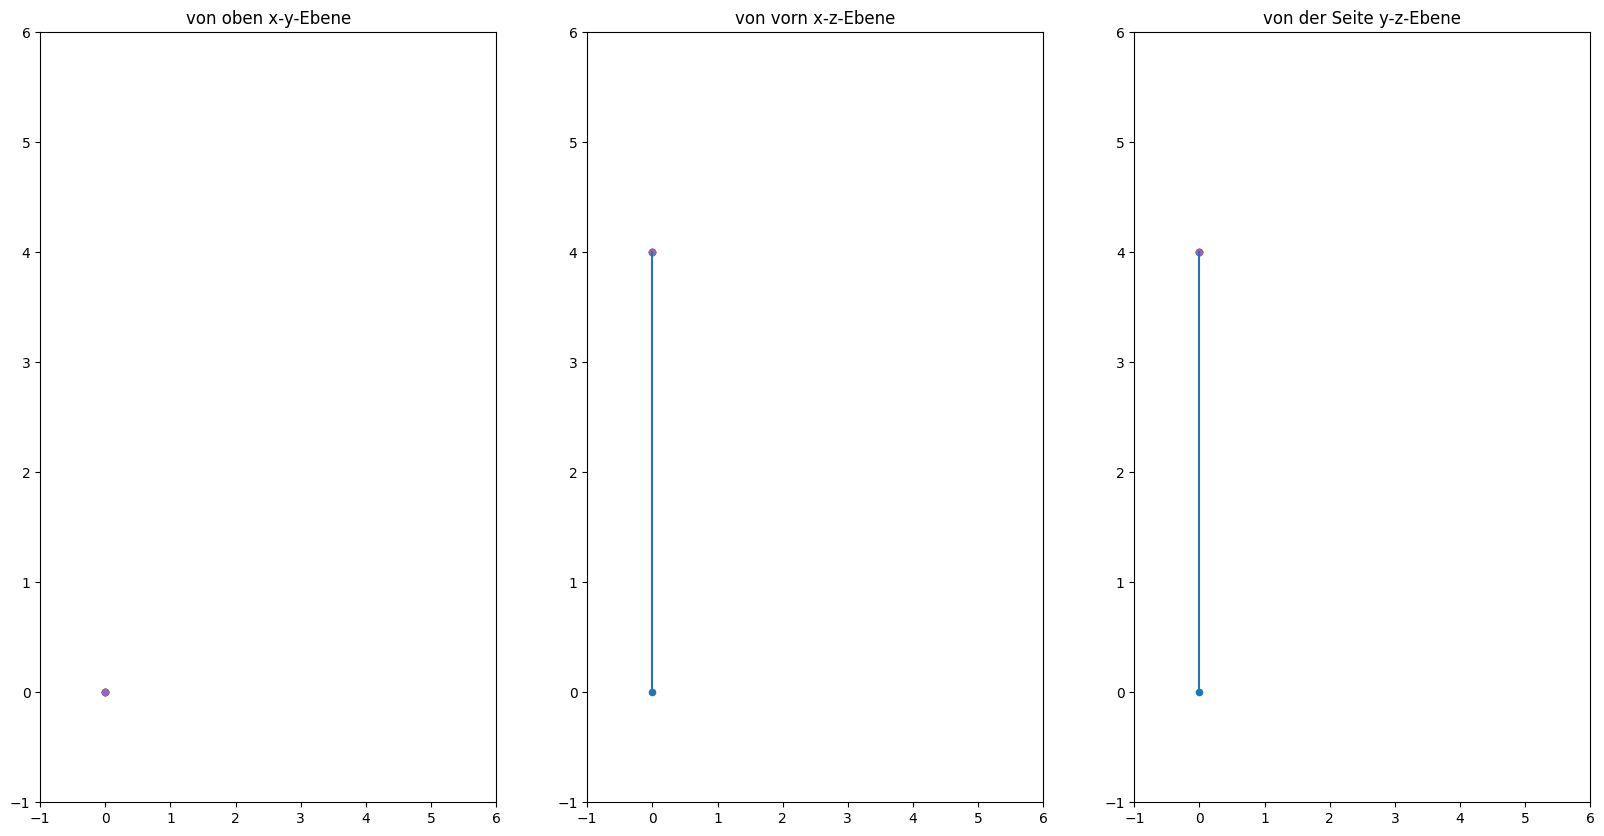

In [8]:
plt.subplots(1,3,figsize=(20,10))

plt.subplot(1,3,1)
plt.xlim(-1, 6)
plt.ylim(-1, 6)
plt.title("von oben x-y-Ebene")
plt.scatter(  x[0] ,y[0], s = 20 )
plt.scatter(  x[1], y[1], s = 20 )
plt.scatter(  x[2], y[2], s = 20 )
plt.scatter(  x[3], y[3], s = 20 )
plt.scatter(  x[4], y[4], s = 20 )
plt.plot(x,y);

plt.subplot(1,3,2)
plt.xlim(-1, 6)
plt.ylim(-1, 6)


plt.title("von vorn x-z-Ebene")
plt.scatter(  x[0] ,z[0], s = 20 )
plt.scatter(  x[1], z[1], s = 20 )
plt.scatter(  x[2], z[2], s = 20 )
plt.scatter(  x[3], z[3], s = 20 )
plt.scatter(  x[4], z[4], s = 20 )
plt.plot(x,z);

plt.subplot(1,3,3)
plt.xlim(-1, 6)
plt.ylim(-1, 6)
plt.title("von der Seite y-z-Ebene")
plt.scatter(  y[0] ,z[0], s = 20 )
plt.scatter(  y[1], z[1], s = 20 )
plt.scatter(  y[2], z[2], s = 20 )
plt.scatter(  y[3], z[3], s = 20 )
plt.scatter(  y[4], z[4], s = 20 )


plt.plot(y,z);

Text(0.5, 0.5, 'Y Label')

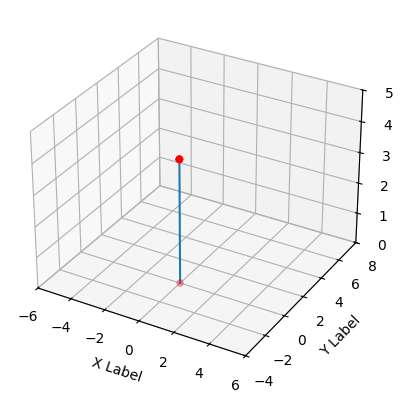

In [9]:
from mpl_toolkits.mplot3d import Axes3D

# Creating a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-6, 6)
ax.set_ylim(-4, 8)
ax.set_zlim(0, 5)
ax.scatter(x, y, z, c='r', marker='o')
ax.plot(x,y,z);
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')

